In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [2]:
test_data = pd.read_csv(r"C:\Users\Isanaka.SaiKumar\Downloads\test_clean.csv")
train_data = pd.read_csv(r"C:\Users\Isanaka.SaiKumar\Downloads\train_clean.csv")

In [4]:
test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


In [7]:
test_data.shape

(418, 14)

In [5]:
train_data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [9]:
train_data.shape

(891, 14)

In [10]:
test_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [11]:
train_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [14]:
train_data.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [16]:
test_data.isnull().sum()

Age              0
Cabin          327
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [17]:
test_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,0.0,418.000000
mean,29.812201,35.561214,0.392344,1100.500000,2.265550,0.447368,NaN,0.839713
std,13.006431,55.856789,0.981429,120.810458,0.841838,0.896760,NaN,1.519072
min,0.170000,0.000000,0.000000,892.000000,1.000000,0.000000,NaN,0.000000
25%,22.000000,7.895800,0.000000,996.250000,1.000000,0.000000,NaN,0.000000
50%,30.000000,14.454200,0.000000,1100.500000,3.000000,0.000000,NaN,0.000000
75%,35.875000,31.471875,0.000000,1204.750000,3.000000,1.000000,NaN,1.000000
max,76.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,NaN,10.000000


In [18]:
train_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,10.000000


In [21]:
print(f"Maximum value of Age column: {train_data['Age'].max()}")
print(f"Minimum value of Age column: {train_data['Age'].min()}")

Maximum value of Age column: 80.0
Minimum value of Age column: 0.42


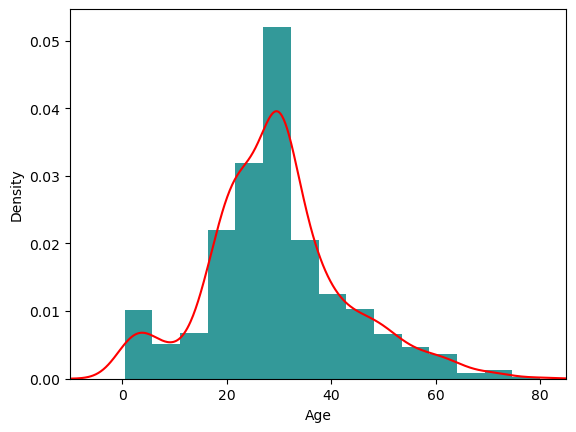

In [50]:
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.8)
train_data["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [66]:
train_data[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by='Survived')

,Survived
Sex,
male,109.0
female,233.0


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    645
C    169
Q     77
Name: Embarked, dtype: int64


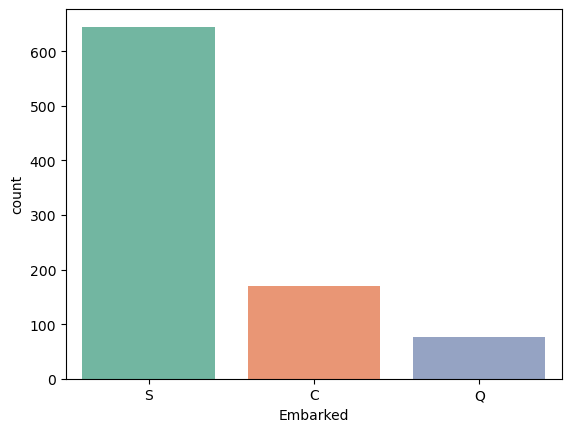

In [74]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_data['Embarked'].value_counts())
sn.countplot(x='Embarked', data = train_data, palette='Set2')
plt.show()

In [77]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [85]:
train_data.head(5)

,Age,Cabin,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,Title,Family_Size,TravelAlone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,3,male,0.0,A/5 21171,Mr,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,female,1.0,PC 17599,Mrs,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,3,female,1.0,STON/O2. 3101282,Miss,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,female,1.0,113803,Mrs,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,3,male,0.0,373450,Mr,0,1


In [91]:
# For better understanding
pd.get_dummies(test_data, columns=["Embarked","Sex"])

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Title,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.5,NaN,7.8292,"Kelly, Mr. James",0,892,3,0,NaN,330911,Mr,0,0,1,0,0,1
1,47.0,NaN,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,1,NaN,363272,Mrs,1,0,0,1,1,0
2,62.0,NaN,9.6875,"Myles, Mr. Thomas Francis",0,894,2,0,NaN,240276,Mr,0,0,1,0,0,1
3,27.0,NaN,8.6625,"Wirz, Mr. Albert",0,895,3,0,NaN,315154,Mr,0,0,0,1,0,1
4,22.0,NaN,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,1,NaN,3101298,Mrs,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,NaN,8.0500,"Spector, Mr. Woolf",0,1305,3,0,NaN,A.5. 3236,Mr,0,0,0,1,0,1
414,39.0,C105,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,NaN,PC 17758,Mrs,0,1,0,0,1,0
415,38.5,NaN,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,0,NaN,SOTON/O.Q. 3101262,Mr,0,0,0,1,0,1
416,30.0,NaN,8.0500,"Ware, Mr. Frederick",0,1308,3,0,NaN,359309,Mr,0,0,0,1,0,1


In [89]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train_data = training
final_train_data.head()

,Age,Cabin,Fare,Survived,Title,Family_Size,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,22.0,NaN,7.2500,0.0,Mr,1,0,0,0,1,0,0,1,1
1,38.0,C85,71.2833,1.0,Mrs,1,0,1,0,0,1,0,0,0
2,26.0,NaN,7.9250,1.0,Miss,0,1,0,0,1,0,0,1,0
3,35.0,C123,53.1000,1.0,Mrs,1,0,1,0,0,0,0,1,0
4,35.0,NaN,8.0500,0.0,Mr,0,1,0,0,1,0,0,1,1


In [99]:
test_data_copy = test_data.copy()
test_data_copy["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
test_data_copy["Fare"].fillna(train_data["Fare"].median(skipna=True), inplace=True)
test_data_copy.drop('Cabin', axis=1, inplace=True)

test_data_copy['TravelAlone']=np.where((test_data_copy["SibSp"]+test_data_copy["Parch"])>0, 0, 1)

test_data_copy.drop('SibSp', axis=1, inplace=True)
test_data_copy.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data_copy, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test_data = testing
final_test_data.head()

,Age,Fare,Survived,Title,Family_Size,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,NaN,Mr,0,1,0,0,1,0,1,0,1
1,47.0,7.0000,NaN,Mrs,1,0,0,0,1,0,0,1,0
2,62.0,9.6875,NaN,Mr,0,1,0,1,0,0,1,0,1
3,27.0,8.6625,NaN,Mr,0,1,0,0,1,0,0,1,1
4,22.0,12.2875,NaN,Mrs,2,0,0,0,1,0,0,1,0


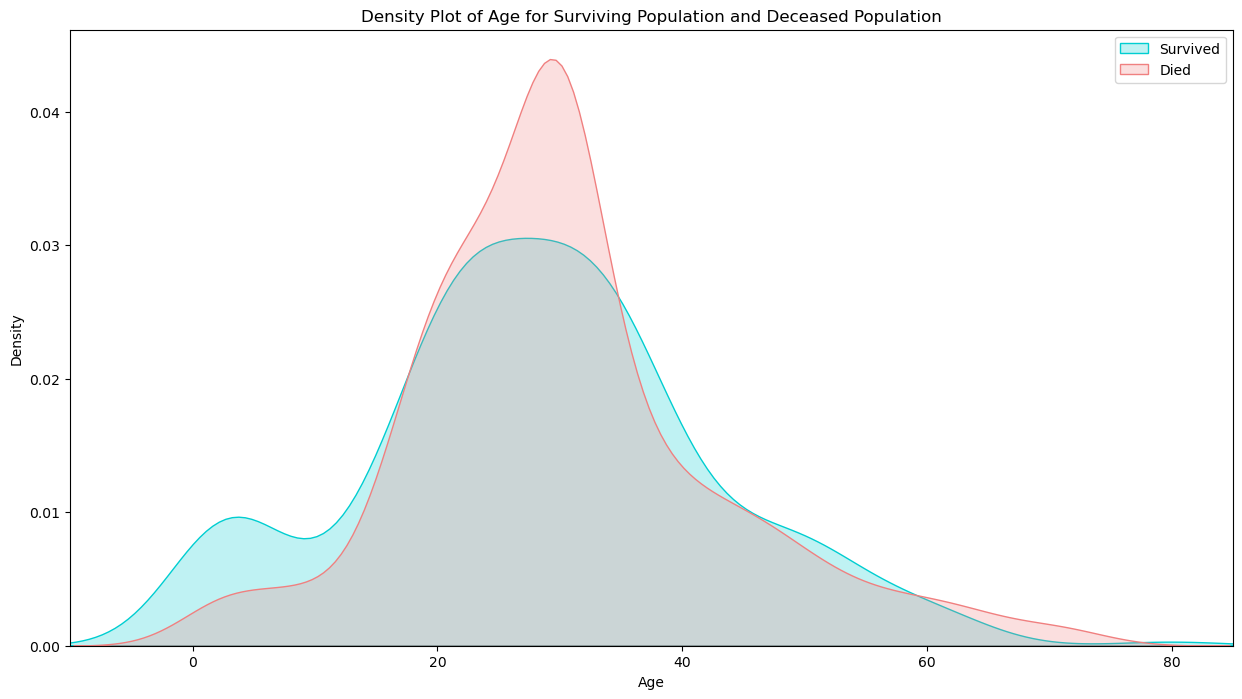

In [97]:
plt.figure(figsize=(15,8))
ax = sn.kdeplot(train_data["Age"][train_data.Survived == 1], color="darkturquoise", shade=True)
sn.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

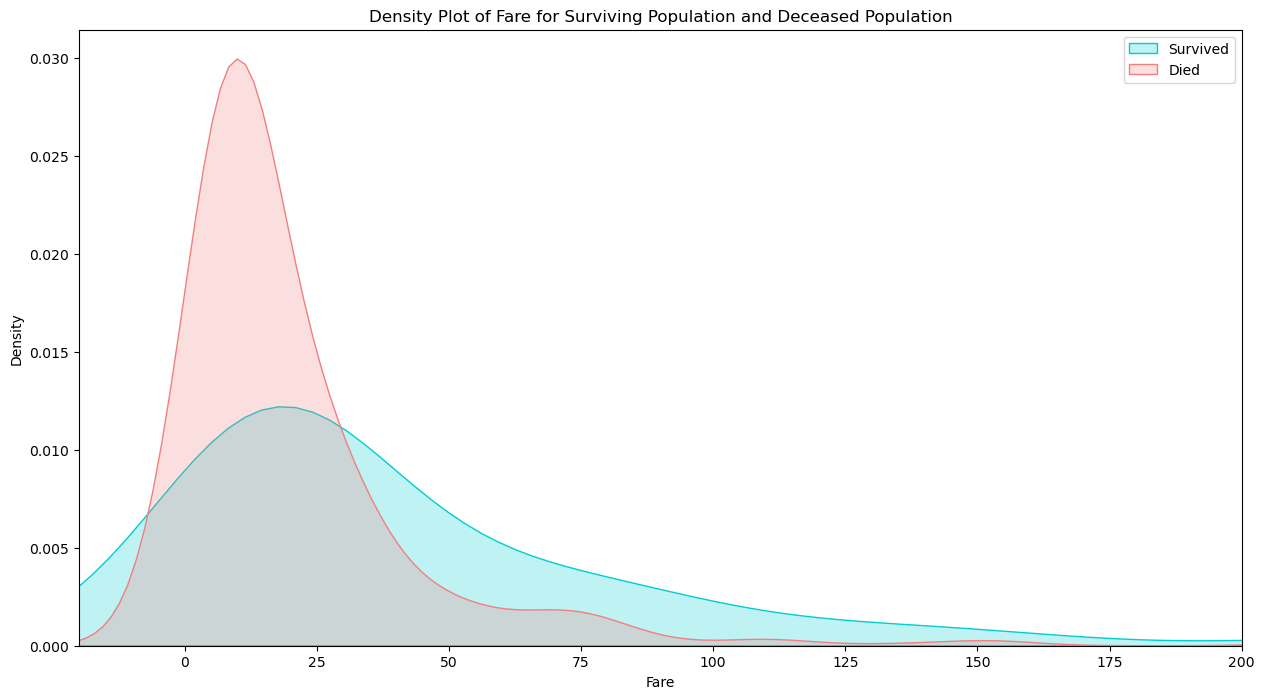

In [96]:
plt.figure(figsize=(15,8))
ax = sn.kdeplot(train_data["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True)
sn.kdeplot(train_data["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

In [100]:
X = final_train_data.drop(['Survived', 'Cabin', 'Title'], axis = 1)
y = final_train_data['Survived']
X_test = final_test_data.drop(['Survived','Title'], axis = 1)
y_test = final_test_data['Survived']

In [103]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X_test)
y_pred

C:\Users\Isanaka.SaiKumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [104]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X, y)

y_pred = clf.predict(X_test)

In [105]:
y_pred

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0.

In [106]:
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X, y)
y_pred = clf_svm.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.